In [7]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [8]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

# Testing some datasets

In [16]:
_train_datafile = 'clean_reconstruction_training_set'
dset_kwargs = {'cgram_shuffle':2}
from data.ReconstructionTrainingDataset import CleanSoundsDataset
SoundsDataset = CleanSoundsDataset
train_datafile = f'{engram_dir}{_train_datafile}.hdf5'
train_dataset = SoundsDataset(train_datafile, subset=.9, **dset_kwargs)

In [31]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=False)

In [32]:
train_features, train_labels = next(iter(train_loader))

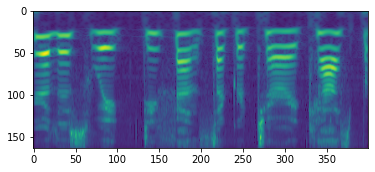

In [29]:
plt.figure() # CGRAM SHUFFLE = 0
plt.imshow(train_features[0,0])

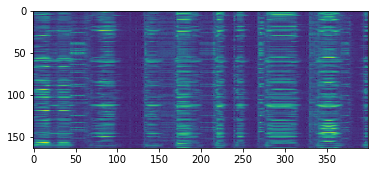

In [25]:
plt.figure() # CGRAM SHUFFLE = 1 # freq shuffle
plt.imshow(train_features[0,0])

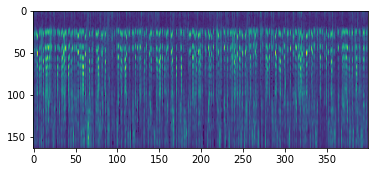

In [33]:
plt.figure() # CGRAM SHUFFLE = 2 # temporal shuffle
plt.imshow(train_features[0,0])

# Reconstruction Training

In [9]:
def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [10]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

In [11]:
tensorboard_dir = f'{engram_dir}1_tensorboard/'

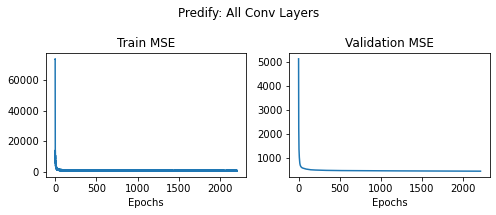

In [4]:
tfdir = tensorboard_dir + 'pnet/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

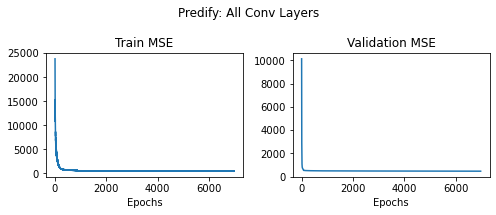

In [5]:
tfdir = tensorboard_dir + 'pnet_snr-9/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

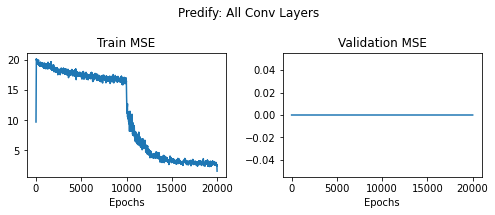

In [14]:
tfdir = tensorboard_dir + 'pnet_rnn_0/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    losses = [e.value for e in ea.Scalars('TrainingLoss/CE')]
    train_loss.extend(losses)
    for epoch in range(len(losses)):
        eval_loss.append(0)
        #eval_loss.append(ea.Scalars(f'EvalPerf/Epoch#{epoch}')[0].value)
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
train_loss = smooth(len(train_loss), train_loss, 50)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

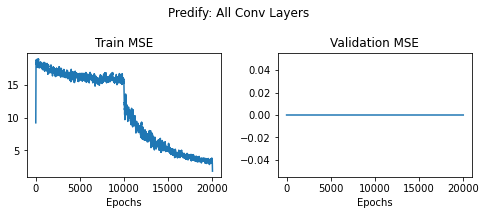

In [15]:
tfdir = tensorboard_dir + 'pnet_rnn_1/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    losses = [e.value for e in ea.Scalars('TrainingLoss/CE')]
    train_loss.extend(losses)
    for epoch in range(len(losses)):
        eval_loss.append(0)
        #eval_loss.append(ea.Scalars(f'EvalPerf/Epoch#{epoch}')[0].value)
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
train_loss = smooth(len(train_loss), train_loss, 50)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

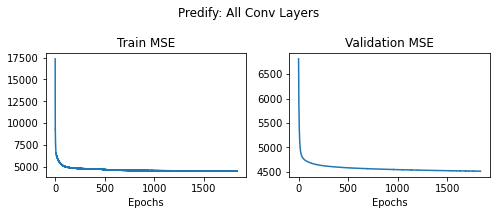

In [7]:
tfdir = tensorboard_dir + 'pnet_gammaNoise/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

# Hyperparameter Training

In [12]:
plot_ci = True

In [17]:
tensorboard_dir = f'{engram_dir}2_hyperp/pnet_temp_shuffle_merged/'

hyper_all
events.out.tfevents.1679252220.ax08.rc.zi.columbia.edu.48218.0
0.47866228222846985
101


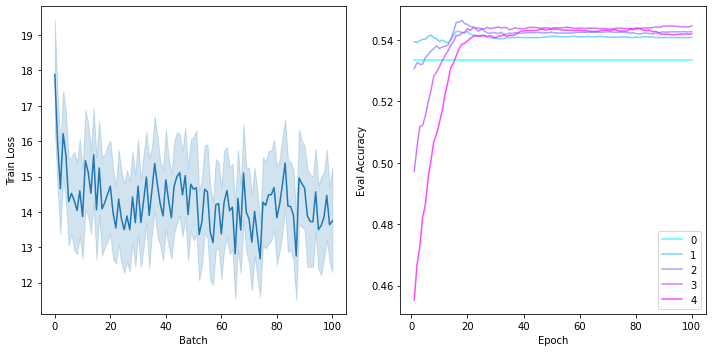

In [18]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    print("====================")
    print(tfdir)
    print("====================")
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect losses
    train_loss = []
    train_batch = []
    eval_loss = []
    eval_epoch = []
    eval_timestep = []
    for tfdir_file in tfdir_files:
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        print(tfdir_file)
        try:
            _train_loss = [e.value for e in ea.Scalars('TrainingLoss/CE')]
        except:
            continue
        _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{1}_feedforward")]
        if np.isnan(_feedforward[-1]): continue
        print(_feedforward[-1])
        epoch = 1
        while True:
            try:
                for timestep in range(5):
                    eval_loss.append(ea.Scalars(f'NoisyPerf/Epoch#{epoch}')[timestep].value)
                    eval_epoch.append(epoch)
                    eval_timestep.append(timestep)
                epoch += 1
            except:
                break
        print(epoch)
        divisor = len(_train_loss)/epoch
        train_loss.extend(_train_loss)
        train_batch.extend([b//divisor for b in range(len(_train_loss))])

    # Make pandas dataframe
    train_df = pd.DataFrame({
        'Train Loss': train_loss,
        'Batch': train_batch
        })
    eval_df = pd.DataFrame({
        'Eval Accuracy': eval_loss,
        'Epoch': eval_epoch,
        'Timestep': eval_timestep 
        })
                
    fig, axs = plt.subplots(1, 2, figsize = (10,5))
    sns.lineplot(x='Batch', y='Train Loss', ax=axs[0], data=train_df)
    colors = plt.cm.cool(np.linspace(0,1,5))
    for timestep in range(5):
        sns.lineplot(
            x='Epoch', y='Eval Accuracy',
            ax=axs[1],
            data=eval_df[eval_df['Timestep']==timestep],
            color=colors[timestep], label=timestep,
            alpha=0.7
            )
    plt.tight_layout()
    plt.show()
    print('\n\n')